In [1]:
import sys
sys.path.insert(1, "games/")
sys.path.insert(1, "networks/")
from tic_tac_toe import TicTacToe
from tic_tac_toe_net import create_network

from model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/network_tic_tac_toe.h5")

2021-12-02 21:04:33.164338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 21:04:33.193320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 21:04:33.193687: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 21:04:33.194280: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 128)    384         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 128)   512         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 128)    0           ['batch_normaliza

In [3]:
state = game.get_init_state()
model.predict(state)

2021-12-02 21:04:35.657300: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([9.9998343e-01, 3.0663696e-06, 3.1642285e-06, 1.0712509e-06,
        4.6051941e-06, 9.2842112e-07, 2.8038301e-06, 1.8981714e-07,
        5.7087908e-07], dtype=float32),
 0.033631783)

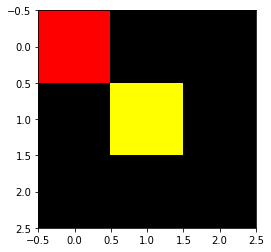

Model prediction: (array([9.3130545e-08, 4.0444553e-02, 1.9290760e-04, 8.3048879e-05,
       8.7717944e-01, 4.0541992e-02, 3.8405330e-04, 2.1155149e-05,
       4.1152667e-02], dtype=float32), -0.026859269)
Root value: -0.03566206225659698


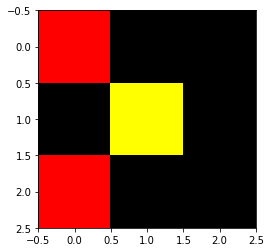

Model prediction: (array([5.0065245e-07, 4.1350208e-02, 4.3103992e-05, 7.5441858e-05,
       2.4117887e-07, 1.8657104e-06, 9.5852357e-01, 1.3598260e-06,
       3.8016669e-06], dtype=float32), 0.009924231)


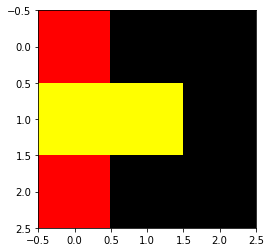

Model prediction: (array([2.5385335e-08, 4.2673334e-02, 4.4500150e-02, 9.1275644e-01,
       6.2389404e-07, 3.4170538e-05, 6.8770155e-06, 9.6549211e-06,
       1.8603250e-05], dtype=float32), -0.025409834)
Root value: -0.069817980597727


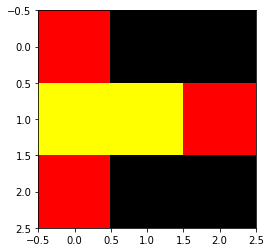

Model prediction: (array([2.4389854e-10, 9.9999702e-01, 2.2347776e-06, 1.2758630e-11,
       5.7820646e-09, 7.0081722e-07, 5.2378603e-08, 1.7201145e-09,
       4.7092813e-10], dtype=float32), 0.0015020628)


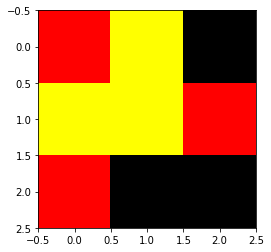

Model prediction: (array([1.8697897e-10, 9.8417109e-01, 2.0697629e-03, 1.8189086e-09,
       5.4754508e-08, 7.1212298e-12, 6.3949312e-07, 6.2591971e-05,
       1.3695871e-02], dtype=float32), -0.013057393)
Root value: 0.2865718573331833


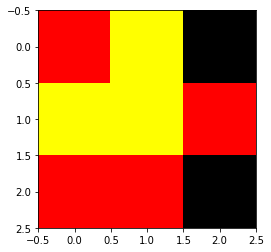

Model prediction: (array([1.8295162e-07, 4.6444666e-06, 9.9451017e-01, 1.2010236e-05,
       8.7690275e-08, 1.5909412e-09, 2.5914646e-06, 2.8830080e-03,
       2.5872756e-03], dtype=float32), 0.5174345)


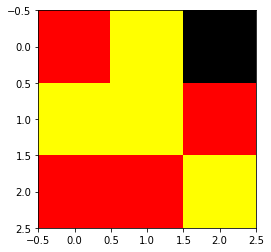

Model prediction: (array([5.2546105e-09, 1.5138911e-05, 3.2715881e-01, 1.4336321e-05,
       1.4963043e-06, 2.9877345e-09, 2.4545521e-02, 2.9969567e-06,
       6.4826173e-01], dtype=float32), 0.4414022)
Root value: -0.0618198823928833


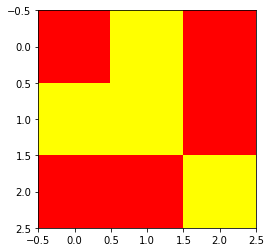

Model prediction: (array([1.9446278e-09, 8.3451532e-08, 9.9999988e-01, 3.6061045e-09,
       3.5492609e-10, 9.2091912e-10, 1.3664700e-08, 1.6894196e-08,
       5.2334953e-10], dtype=float32), -0.19988126)


In [7]:
state = game.get_init_state()
state = game.get_new_state(state, 0)
game.play_vs(model, state, 25)